## Investigating and Modeling Customer Lifetimes

### About the data:

* 3333 observations
* Data contains following collumns:
    * state
    * account.length
    * area.code
    * phone.number
    * international.plan
    * voice.mail.plan
    * number.vmail.messages
    * total.day.minutes
    * total.day.calls
    * total.day.charge
    * total.eve.minutes
    * total.eve.calls
    * total.eve.charge
    * total.night.minutes
    * total.night.calls
    * total.night.charge
    * total.intl.minutes
    * total.intl.calls
    * total.intl.charge
    * number.customer.service.calls
    * Churn
    
### Objectives:

* Create graphs depicting distribution of customers
* Begin modeling churn models
* Provide Recommendation on what factors may influence churn and how it can possibly be reduced

In [2]:
options(jupyter.plot_mimetypes = 'image/png')
dat <- read.csv('users-2015-08-18.csv', sep=',')

In [24]:
library(survival)
library(ggplot2)

df <- read.table('users-2015-08-18.csv', sep=',')

df$total.minutes <- df$total.day.minutes + df$total.eve.minutes + df$total.night.minutes + df$total.intl.minutes
df$total.charge <- df$total.day.charge + df$total.eve.charge + df$total.night.charge + df$total.intl.charge

df$avg.lifetime.value <- df$total.charge/df$account.length

p <- ggplot(df, aes(account.length,total.minutes ,colour = Churn))

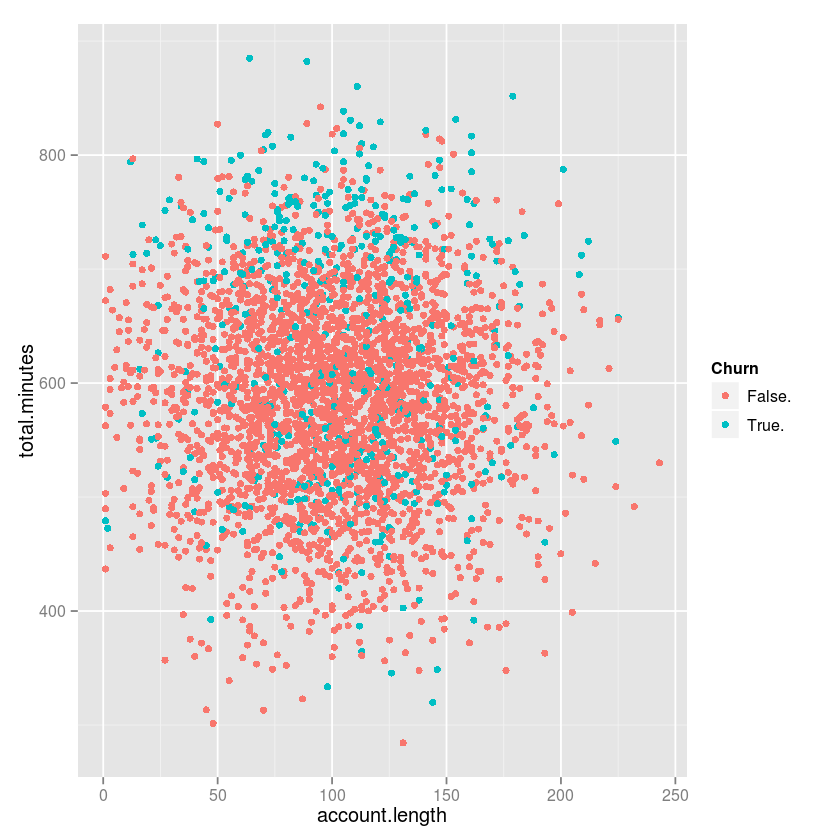

In [25]:
p + geom_point()

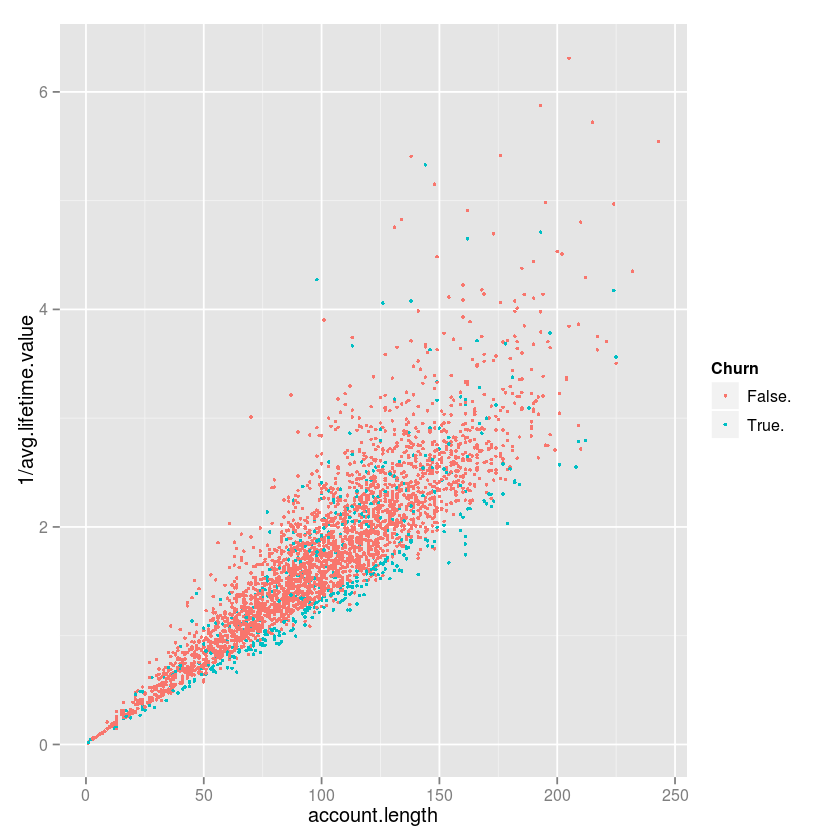

In [26]:
p <- ggplot(df, aes(account.length,1/avg.lifetime.value ,colour = Churn))
p + geom_point(size=1)

No id variables; using all as measure variables


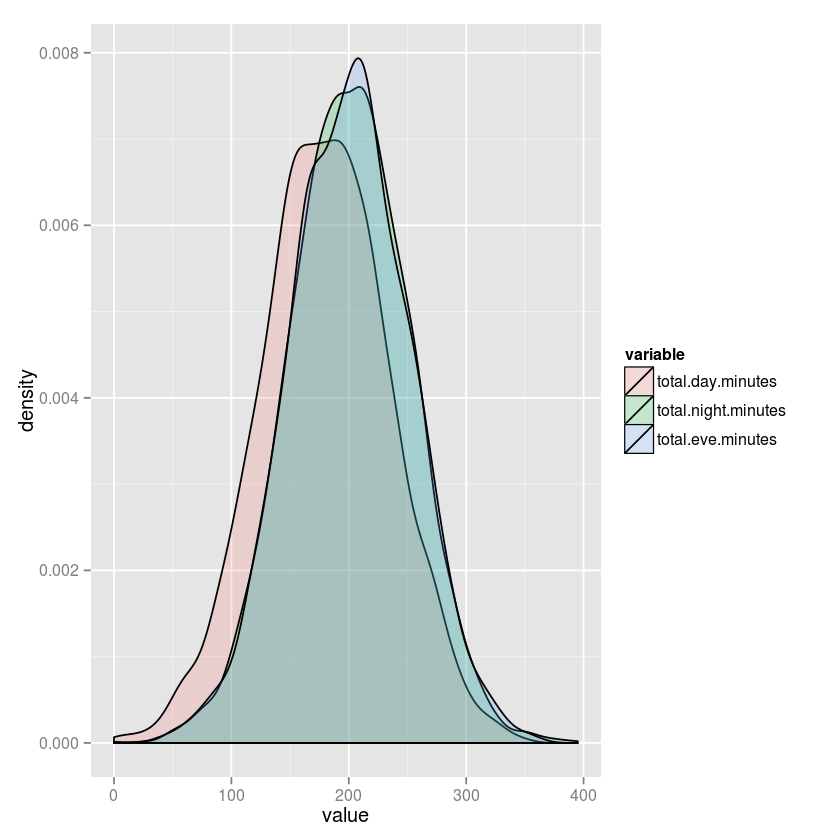

In [27]:
library(reshape2)
vars <- c('total.day.minutes','total.night.minutes','total.eve.minutes')
df2 <- df[vars]
data<-melt(df2)
p <- ggplot(data,aes(x=value, fill=variable))
p + geom_density(alpha=.20)

To model customer lifetimes, we'll fit a Cox proportional hazards regression model, which uses the equation below:

#### The hazard function for the Cox proportional hazard model

$\lambda(t|X) = \lambda_0(t)\exp(\beta_1X_1 + \cdots + \beta_pX_p) = \lambda_0(t)\exp(X \beta^\prime)$

In [28]:
s <- with(df, Surv(account.length, as.numeric(Churn)))

model <- coxph(s ~ total.day.charge + number.customer.service.calls, data=df[, -4])
summary(model)

Call:
coxph(formula = s ~ total.day.charge + number.customer.service.calls, 
    data = df[, -4])

  n= 3333, number of events= 483 

                                 coef exp(coef) se(coef)     z Pr(>|z|)    
total.day.charge              0.05373   1.05520  0.00502 10.70   <2e-16 ***
number.customer.service.calls 0.31043   1.36401  0.02726 11.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                              exp(coef) exp(-coef) lower .95 upper .95
total.day.charge                  1.055     0.9477     1.045     1.066
number.customer.service.calls     1.364     0.7331     1.293     1.439

Concordance= 0.702  (se = 0.015 )
Rsquare= 0.066   (max possible= 0.872 )
Likelihood ratio test= 228.2  on 2 df,   p=0
Wald test            = 244.6  on 2 df,   p=0
Score (logrank) test = 246.6  on 2 df,   p=0


In [29]:
model2 <- coxph(s ~ total.day.charge + strata(number.customer.service.calls < 4), data=df[, -4])
model3 <- coxph(s ~ total.day.charge + strata(number.customer.service.calls < 2), data=df[, -4])
summary(model2)

Call:
coxph(formula = s ~ total.day.charge + strata(number.customer.service.calls < 
    4), data = df[, -4])

  n= 3333, number of events= 483 

                     coef exp(coef) se(coef)     z Pr(>|z|)    
total.day.charge 0.054980  1.056520 0.004991 11.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                 exp(coef) exp(-coef) lower .95 upper .95
total.day.charge     1.057     0.9465     1.046     1.067

Concordance= 0.715  (se = 0.018 )
Rsquare= 0.036   (max possible= 0.839 )
Likelihood ratio test= 121.8  on 1 df,   p=0
Wald test            = 121.4  on 1 df,   p=0
Score (logrank) test = 121.1  on 1 df,   p=0


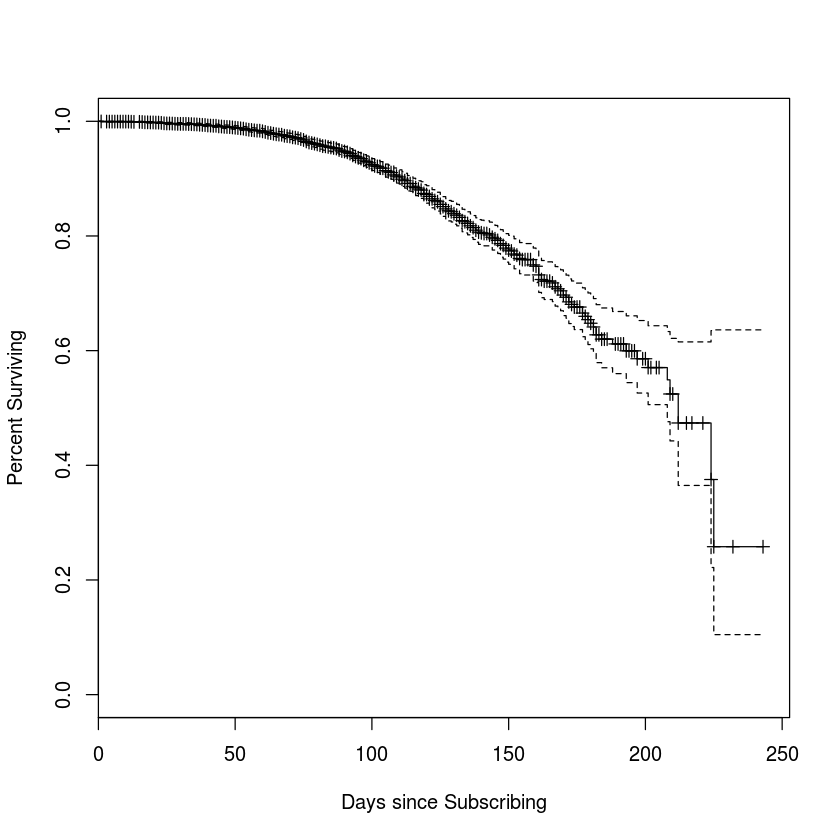

In [30]:
plot(survfit(model), xlab = 'Days since Subscribing', ylab = 'Percent Surviving')

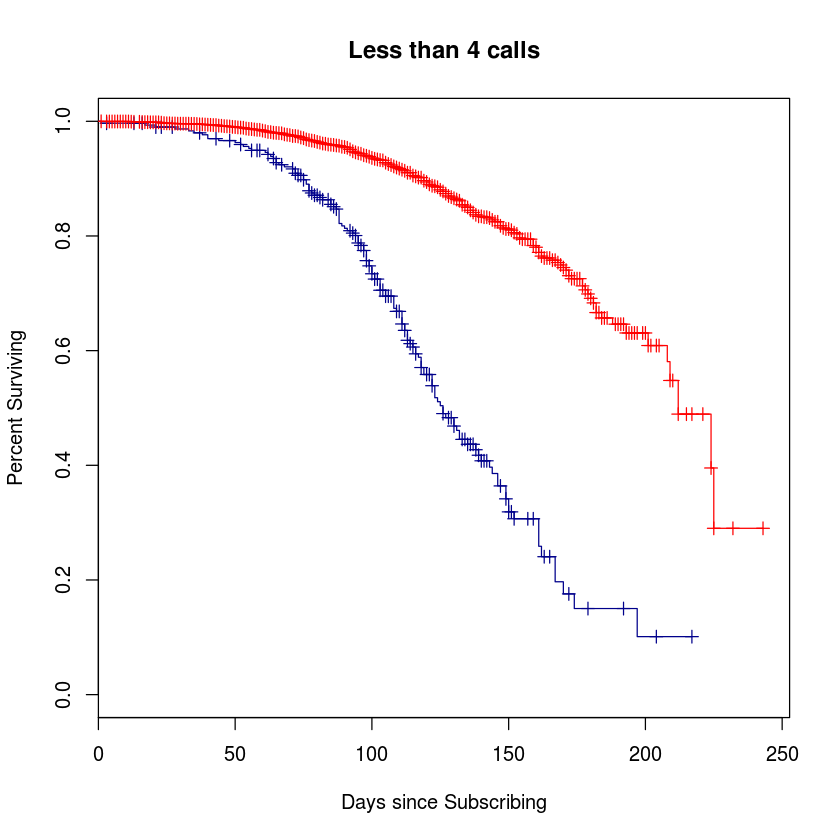

In [31]:
plot(survfit(model2), col=c("dark blue", "red"), main='Less than 4 calls', xlab = 'Days since Subscribing', ylab = 'Percent Surviving')

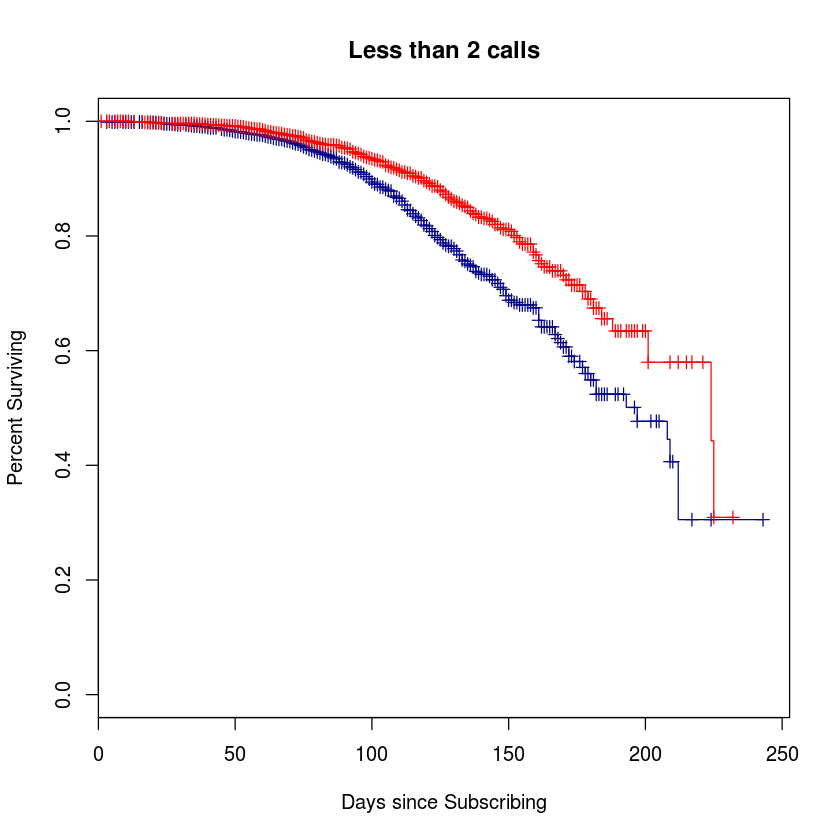

In [32]:
plot(survfit(model3), col=c("dark blue", "red"), main='Less than 2 calls', xlab = 'Days since Subscribing', ylab = 'Percent Surviving')